In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cat_id = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cat_id.csv')
cat_id.head()

,cat_id,cat_name
0,2,Japanese
1,3,Thai
2,4,Chinese
3,5,Italian
4,6,Korean


In [4]:
wongnai = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wongnai.csv')
wongnai.head()

,Unnamed: 0,id,name,category_id,city_id,latitude,longitude,price_range,avg_price,number_of_bookmarks,number_of_favorite_bookmarks,top,best_of_wongnai,number_of_checkins,all_time_score
0,0,2,บ้านกลมกิ๊ก,3.0,1.0,13.738962,100.550248,2.0,175.0,294,84,1,NaN,32,22487.872358
1,1,3,โรงเบียร์เยอรมันตะวันแดง,33.0,1.0,13.842320,100.634959,3.0,NaN,2,2,0,NaN,0,92.900000
2,2,4,Kosirae,43.0,1.0,13.724999,100.579715,3.0,375.0,3405,989,1,66.0,173,239274.950390
3,3,5,Ho Kitchen Seafood Rama 3,29.0,1.0,13.687333,100.550817,3.0,NaN,94,24,0,NaN,21,13307.512755
4,4,6,Barley Bistro & Bar,3.0,1.0,13.726499,100.529425,3.0,375.0,249,146,1,NaN,14,19606.094680


In [5]:
wongnai.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 1
category_id                         60
city_id                            206
latitude                             0
longitude                            0
price_range                     100196
avg_price                       278496
number_of_bookmarks                  0
number_of_favorite_bookmarks         0
top                                  0
best_of_wongnai                 283128
number_of_checkins                   0
all_time_score                       0
dtype: int64

In [6]:
wongnai2 = wongnai.dropna()
wongnai2.shape

(264, 15)

# 1. ข้อมูลนี้มีปัญหาในเรื่องข้อมูลไม่ครบถ้วน หรือติดลบ ที่ไหนบ้าง และเมื่อตัดแถวที่มีข้อมูล NaN หรือ ติดลบแล้วเหลือเท่าไหร่
ข้อมูลที่มีปัญหาในแต่ละคอลัมน์ มีจำนวนตามที่แสดงจากโค้ด wongnai.isnull().sum()

และเมื่อตัดแถวที่มีปัญหาแล้ว เหลือ 264 แถว

In [7]:
wongnai.sort_values(by='best_of_wongnai').head(5)['name']

141447    Water Library Brasserie
135966          Caturday cat cafe
129258                   Chef Man
141406               Din Tai Fung
118873                 Eat Am Are
Name: name, dtype: object

# 2. จงแสดงชื่อร้านอาหาร 5 อันดับแรกในกลุ่ม Best of Wongnai
1. Water Library Brasserie
2. Caturday Cat Cafe
3. Chef Man
4. Din Tai Fung
5. Eat Am Are

In [8]:
wongnai3 = wongnai[np.isfinite(wongnai['best_of_wongnai'])][['category_id', 'name', 'best_of_wongnai']].reset_index().groupby('category_id')
wongnai33 = pd.DataFrame(wongnai3.size()).reset_index()
wongnai33.columns = ['cat_id', 'amount']
cat_wongnai = pd.merge(cat_id, wongnai33, left_on='cat_id', right_on='cat_id', how='inner')
total = cat_wongnai['amount'].sum()
cat_wongnai['percent'] = cat_wongnai['amount'] / total * 100
cat_wongnai

,cat_id,cat_name,amount,percent
0,2,Japanese,14,9.655172
1,3,Thai,36,24.827586
2,4,Chinese,18,12.413793
3,5,Italian,10,6.896552
4,6,Korean,4,2.758621
5,7,Vietnam,8,5.517241
6,8,American,2,1.379310
7,9,French,6,4.137931
8,10,Indian,3,2.068966
9,11,Buffet,1,0.689655


# 3. จงระบุสัดส่วนของร้านอาหารประเภทต่างๆ ในกลุ่ม Best of Wongnai

In [9]:
cat_wongnai[['cat_name', 'percent']]

,cat_name,percent
0,Japanese,9.655172
1,Thai,24.827586
2,Chinese,12.413793
3,Italian,6.896552
4,Korean,2.758621
5,Vietnam,5.517241
6,American,1.379310
7,French,4.137931
8,Indian,2.068966
9,Buffet,0.689655


In [10]:
wongnai4 = wongnai.groupby(['category_id'])['number_of_checkins'].sum()
cat4 = pd.merge(cat_id, wongnai4, left_on='cat_id', right_on='category_id', how='inner')
cat4.sort_values(by='number_of_checkins', ascending=False).head(3)

,cat_id,cat_name,number_of_checkins
12,14,Coffee Shop,88756
1,3,Thai,68204
0,2,Japanese,27721


# 4. จงระบุกลุ่มร้านอาหารทีมีผู้ใช้ไปใช้บริการมากที่สุด 3 อันดับแรก
1. Coffee Shop 
2. Thai
3. Japanese


In [0]:
import matplotlib.pyplot as plt

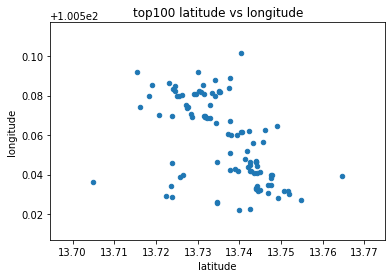

In [12]:
df6=wongnai.sort_values(by=["best_of_wongnai"]).head(100)
df6.head(100).plot(kind='scatter', x='latitude', y='longitude', title='top100 latitude vs longitude');

# 5. ร้านอาหารส่วนใหญ่ใน Top 100 ของ Best of Wongnai ตั้งอยู่ในย่านสีลม